# Importing needed libraries 

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 


In [21]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Oredering Categorical ordinal data

In [23]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [24]:
cat_type=pd.api.types.CategoricalDtype(categories=['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"],ordered=True)
df['parental level of education']=df['parental level of education'].astype(cat_type)

In [25]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [26]:
cat_type=pd.api.types.CategoricalDtype(categories=['free/reduced','standard'],ordered=True)
df['lunch']=df['lunch'].astype(cat_type)

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Engineering a new feature

In [28]:
df['percentage']=(df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# Exploratory Analysis

<AxesSubplot:xlabel='count', ylabel='parental level of education'>

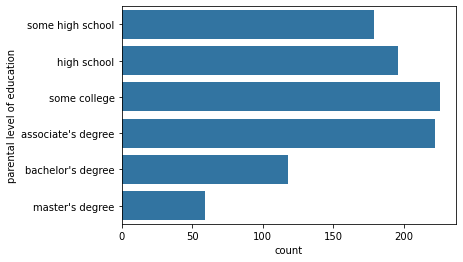

In [29]:
sb.countplot(data=df,y='parental level of education',color=sb.color_palette()[0])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

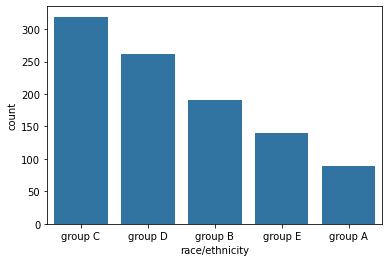

In [30]:
#race/ethnicity counts
sb.countplot(data=df,x='race/ethnicity',order=df['race/ethnicity'].value_counts().index,color=sb.color_palette()[0])

(array([  4.,   7.,  22.,  64., 140., 182., 237., 168., 120.,  56.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <BarContainer object of 10 artists>)

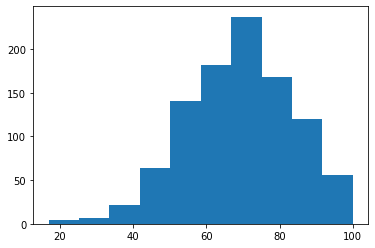

In [59]:
#the distribution of reading scores
plt.hist(df['reading score'])


(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

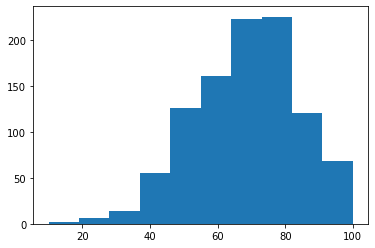

In [33]:
#the distribution of writing scores
plt.hist(df['writing score'])


(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

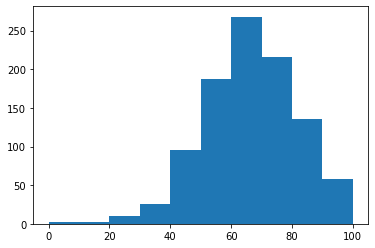

In [34]:
#the distribution of math scores

plt.hist(df['math score'])

C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


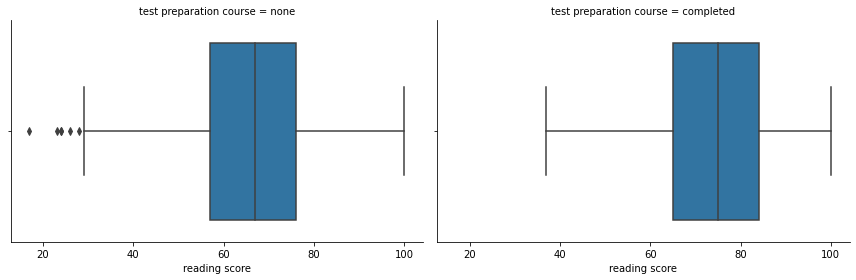

In [35]:
# figuring out the effect of test preparation course status on reading score
g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4)
g.map(sb.boxplot,'reading score')


C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


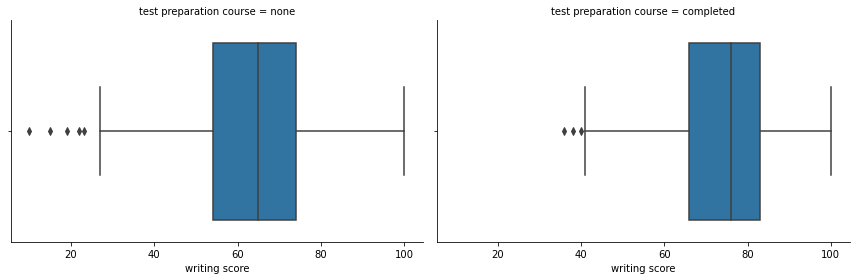

In [36]:
# figuring out the effect of test preparation course status on writing score

g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4)
g.map(sb.boxplot,'writing score')

C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


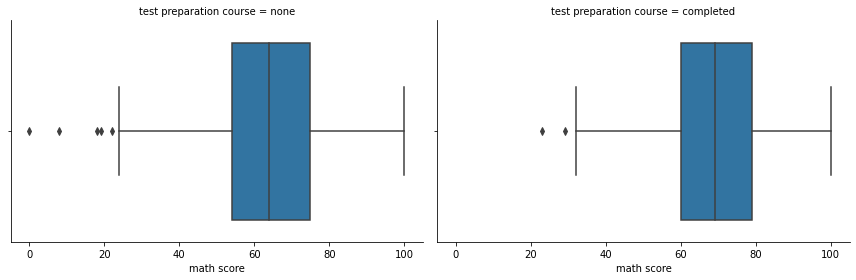

In [37]:
# figuring out the effect of test preparation course status on math score

g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4)
g.map(sb.boxplot,'math score')

C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


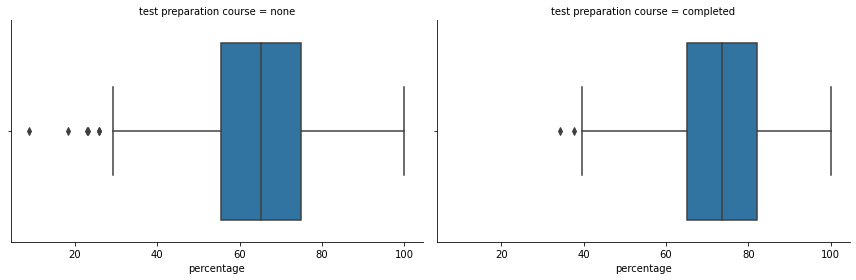

In [38]:
# figuring out the effect of test preparation course status on total percentage

g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4)
g.map(sb.boxplot,'percentage')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

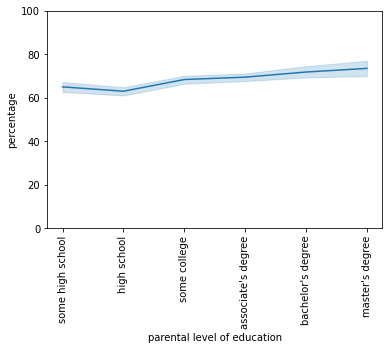

In [64]:
#figuring out the relationship between parental level degree and percentage
sb.lineplot(data=df,x='parental level of education',y='percentage',color=sb.color_palette()[0])
plt.ylim(0,100)
plt.xticks(rotation=90)

(0.0, 100.0)

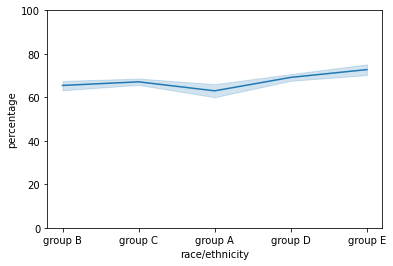

In [65]:
#figuring out if race is at all correlated with total percemtages
sb.lineplot(data=df,x='race/ethnicity',y='percentage')
plt.ylim(0,100)

C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


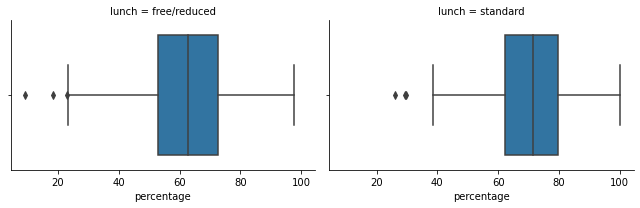

In [47]:
#figuring out the relationship between lunch plan and total percentage
g=sb.FacetGrid(data=df,col='lunch',aspect=1.5)
g.map(sb.boxplot,'percentage')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'math score'),
  Text(1.5, 0, 'reading score'),
  Text(2.5, 0, 'writing score'),
  Text(3.5, 0, 'percentage')])

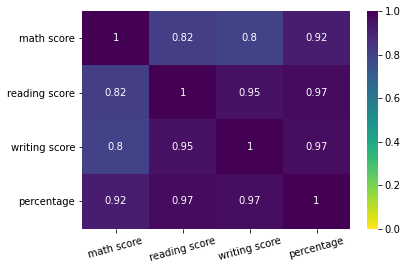

In [41]:
#finding the correaltion between scores between test subjects and total percentage 
sb.heatmap(df.corr(),annot=True,cmap='viridis_r',vmin=0)
plt.xticks(rotation=15)

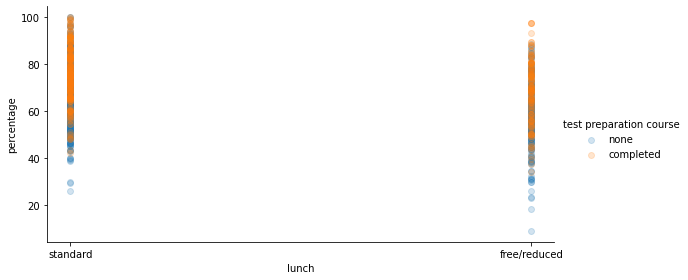

In [43]:
#since lunch and test preparation course are the most potential factors in total percentage we trying to find the relationship 
g=sb.FacetGrid(data=df,hue='test preparation course',height=4,aspect=2)
g.map(plt.scatter,'lunch','percentage',alpha=0.2)
g.add_legend()

# Testing our findings

In [52]:
#bootsraping the percentage means diffrences between people who completed the course and people who didn't
means=[]
for _ in range(10000):
    samp=df.sample(df.shape[0],replace = True)
    means.append(samp[samp['test preparation course']=='completed']['percentage'].mean()-samp[samp['test preparation course']=='none']['percentage'].mean())

Text(0.5, 0, "percentage mean diffrence between people who completed the course and people who didn't")

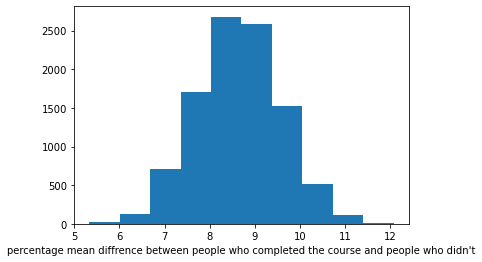

In [81]:
#means distrubtion
plt.hist(means)
plt.xlabel("percentage mean diffrence between people who completed the course and people who didn't")

## Hyp test 1
### H0 : mean percentage of course completed - mean percentage of couse not completed <= 0 
### HA : mean percentage of course completed - mean percentage of couse not completed > 0 

In [73]:

null_vals=np.random.normal(0,np.std(means),len(means))

p_val = (null_vals>means).mean()
p_val

0.0

In [74]:
np.min(means),np.max(means)

(5.2676379908018305, 11.96933649761906)

In [75]:
means=[]
for _ in range(10000):
    samp=df.sample(df.shape[0],replace = True)
    means.append(samp[samp['lunch']=='standard']['percentage'].mean()-samp[samp['lunch']=='free/reduced']['percentage'].mean())

Text(0.5, 0, 'percentage mean diffrence between people who had standard lunch plan and people who had free or reduced lunch plan')

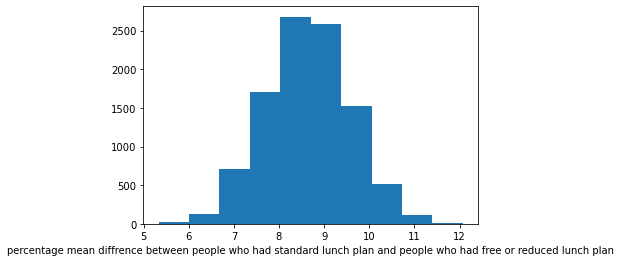

In [82]:
plt.hist(means)
plt.xlabel("percentage mean diffrence between people who had standard lunch plan and people who had free or reduced lunch plan")

## Hyp test 2
### H0 : mean percentage of standard lunch - mean percentage of free/reduced lunch <= 0 
### HA : mean percentage of standard lunch - mean percentage of free/reduced lunch > 0 


In [77]:
null_vals=np.random.normal(0,np.std(means),len(means))
p_val = (null_vals>means).mean()
p_val

0.0

In [78]:
np.min(means),np.max(means)

(5.329386624614159, 12.074521758752766)

### with 0.0 pvalue we decide to reject the null hypothes